# 2. CAGEr Data Analysis

## 1. Prepare input files 

for preparation of input files see: 02_promoter-celltype_matrix/data_preparation_tissue_FANTOM3and4CAGE_all_tags.ipynb

In [39]:
library(CAGEr)

# load human genome package
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("BSgenome.Hsapiens.UCSC.hg18")

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

Installing package(s) 'BSgenome.Hsapiens.UCSC.hg18'

Installation path not writeable, unable to update packages: BBmisc, BH,
  BatchJobs, BiocManager, Boruta, C50, Cairo, Ckmeans.1d.dp, Cubist, DBI,
  DEoptimR, DT, Formula, GA, GGally, GSA, GeneNet, GetoptLong, HMM,
  HardyWeinberg, Hmisc, KernSmooth, LSD, Lahman, Matrix, MatrixModels, NMF,
  PerfMeas, R.cache, R.matlab, R.methodsS3, R.oo, R.utils, R2HTML, R6,
  RApiSerialize, RCircos, RColorBrewer, RCurl, RJSONIO, RMariaDB, RMySQL,
  RPostgreSQL, RPostgres, RRF, RSQLite, RSpectra, RWeka, Rcpp, RcppAnnoy,
  RcppArmadillo, RcppEigen, RcppHNSW, RcppNumerical, RcppParallel, Rdpack,
  RhpcBLASctl, Rtsne, SCORPIUS, SQUAREM, SparseM, SuppDists, TFMPvalue,
  TH.data, TSP, TeachingDemos, VennDiagram, WGCNA, acepack, ade4, akima, amap,
  aod, ape, arm, askpass, babelwhale, backports, base64, batchtools, bayesm,
  bbmle, bdsmatrix, beanplot, beeswarm, bgmm, bibtex, bigmemory,

## 2. create CAGEset object

In [8]:
getwd()

[1] "/project/pauline_association_plots/code/01_promoter-celltype_matrix"

In [41]:
# a dataset named "undefined" was not considered
# list all files in the folder
all_files <- list.files(path = "/project/pauline_association_plots_data/experiments_single_data_2/ctss/data_1pt")

# change names and remove extension
excluded_ext <- "_ctss_cluster.ctss"
files_without_ext <- sub(paste0(excluded_ext, "$"), "", all_files)

tissuesCAGEset <-  new("CAGEset", genomeName = "BSgenome.Hsapiens.UCSC.hg18",
                      inputFiles = all_files,
                      inputFilesType = "ctss",
                      sampleLabels = files_without_ext
                      )
                     




tissuesCAGEset


S4 Object of class CAGEset

Input data information
Reference genome (organism): BSgenome.Hsapiens.UCSC.hg18
Input file type: ctss
Input file names: adipose.ctss, adrenal_gland.ctss, blood.ctss, bone_marrow.ctss, brain.ctss, breast.ctss, cecum.ctss, cerebellum.ctss, cerebrum.ctss, colon.ctss, embryo.ctss, epididymis.ctss, frontal_lobe.ctss, heart.ctss, kidney.ctss, large_intestine.ctss, liver.ctss, lung.ctss, mammary_gland.ctss, muscle.ctss, occipital_lobe.ctss, pancreas.ctss, parietal_lobe.ctss, prostate_gland.ctss, rectum.ctss, renal_artery.ctss, skin.ctss, small_intestine.ctss, spleen.ctss, testis.ctss, thymus.ctss, ureter.ctss, urinary_bladder.ctss
Sample labels: adipose.ctss, adrenal_gland.ctss, blood.ctss, bone_marrow.ctss, brain.ctss, breast.ctss, cecum.ctss, cerebellum.ctss, cerebrum.ctss, colon.ctss, embryo.ctss, epididymis.ctss, frontal_lobe.ctss, heart.ctss, kidney.ctss, large_intestine.ctss, liver.ctss, lung.ctss, mammary_gland.ctss, muscle.ctss, occipital_lobe.ctss, pancre

## 3. Reading in the Data

In [42]:
setwd('/project/pauline_association_plots_data/experiments_single_data_2/ctss/data_1pt')
# a single set of all TSSs detected across all input datasets and a table with 
# counts of CAGE tags supporting each TSS in every dataset is created

getCTSS(tissuesCAGEset)

ctss <- CTSStagCount(tissuesCAGEset)


Reading in file: adipose.ctss...


Reading in file: adrenal_gland.ctss...


Reading in file: blood.ctss...


Reading in file: bone_marrow.ctss...


Reading in file: brain.ctss...


Reading in file: breast.ctss...


Reading in file: cecum.ctss...


Reading in file: cerebellum.ctss...


Reading in file: cerebrum.ctss...


Reading in file: colon.ctss...


Reading in file: embryo.ctss...


Reading in file: epididymis.ctss...


Reading in file: frontal_lobe.ctss...


Reading in file: heart.ctss...


Reading in file: kidney.ctss...


Reading in file: large_intestine.ctss...


Reading in file: liver.ctss...


Reading in file: lung.ctss...


Reading in file: mammary_gland.ctss...


Reading in file: muscle.ctss...


Reading in file: occipital_lobe.ctss...


Reading in file: pancreas.ctss...


Reading in file: parietal_lobe.ctss...


Reading in file: prostate_gland.ctss...


Reading in file: rectum.ctss...


Reading in file: renal_artery.ctss...


Reading in file: skin.ctss...


Reading in file

## 4. Correlation between Samples

In [44]:
corr.m <- plotCorrelation(tissuesCAGEset, samples = "all", method = "pearson")

## 5. Normalization

In [45]:
# show number of cage tags in every sample
librarySizes(tissuesCAGEset)

adipose.ctss   adrenal_gland.ctss           blood.ctss 
              364053               223186                76425 
    bone_marrow.ctss           brain.ctss          breast.ctss 
              412292               510039                47909 
          cecum.ctss      cerebellum.ctss        cerebrum.ctss 
              463181                93618               712859 
          colon.ctss          embryo.ctss      epididymis.ctss 
               93781               407490                 8578 
   frontal_lobe.ctss           heart.ctss          kidney.ctss 
               58280               140732                39251 
large_intestine.ctss           liver.ctss            lung.ctss 
               39906              1035938                90830 
  mammary_gland.ctss          muscle.ctss  occipital_lobe.ctss 
               61961               107089               151198 
       pancreas.ctss   parietal_lobe.ctss  prostate_gland.ctss 
              135163                35147                14180 
         rectum.ctss    renal_artery.ctss            skin.ctss 
               28173                17017               480768 
small_intestine.ctss          spleen.ctss          testis.ctss 
              164031               119952               230223 
         thymus.ctss          ureter.ctss urinary_bladder.ctss 
               94908                13333                18760

### Plot reverse cumulative Plots

png 
  2

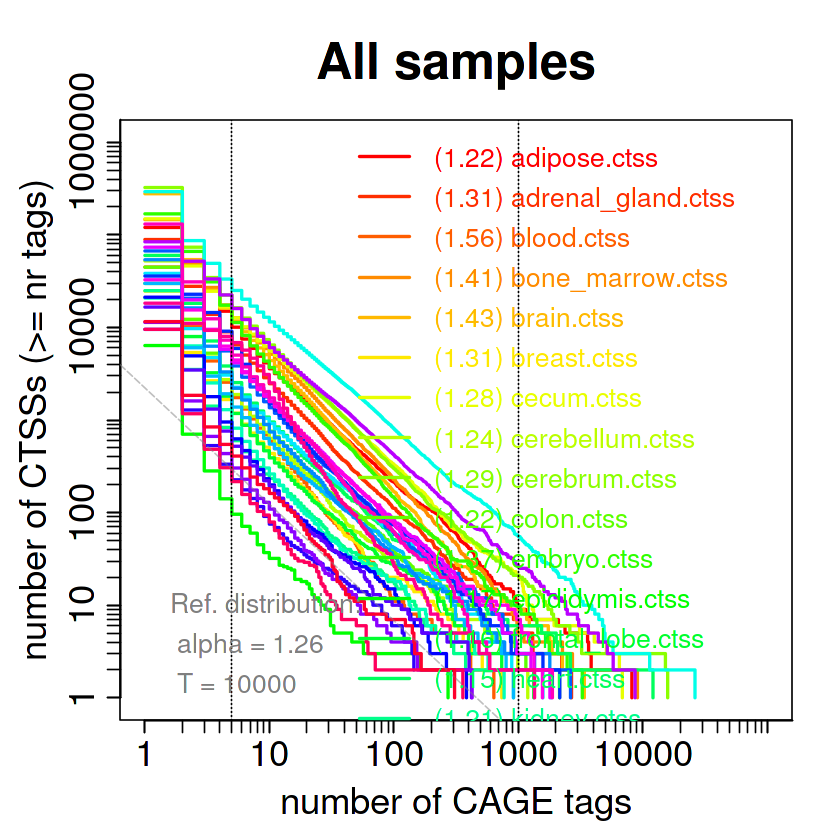

In [49]:
plotReverseCumulatives(tissuesCAGEset, fitInRange = c(5, 1000), onePlot = TRUE)

In [52]:
normalizeTagCount(tissuesCAGEset, method = "powerLaw",
                  fitInRange = c(5, 1000), alpha = 1.26, T = 100000)


Normalizing tag count...



## 6. Export CAGE signal to bedGraph

In [43]:
exportCTSStoBedGraph(tissuesCAGEset, values = "normalized", oneFile = FALSE)

Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
“CTSS object contains 18565 out-of-bound ranges located on sequences
  chr19, chr3, and chr4. Note that ranges located on a sequence whose
  length is unknown (NA) or on a circular sequence are not considered
  out-of-bound (use seqlengths() and isCircular() to get the lengths and
  circularity flags of the underlying sequences). You can use trim() to
  trim these ranges. See ?`trim,GenomicRanges-method` for more
  information.”
Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
“UnstitchedGPos object contains 18565 out-of-bound ranges located on
  sequences chr19, chr3, and chr4. Note that ranges located on a sequence
  whose length is unknown (NA) or on a circular sequence are not
  considered out-of-bound (use seqlengths() and isCircular() to get the
  lengths and circularity flags of the underlying sequences). You can use
  trim() to trim these ranges. See ?`trim,GenomicRanges-method` for m

## 7. CTSS Clustering

TSSs can be spatially clustered into larger transcriptional units, called tag clusters (TCs) that correspond to individual promoters

In [55]:
# perform a simple distance-based clustering using 20bp as a maximal allowed distance between two neighbouring TSSs
# Prior to clustering  filter out low-fidelity TSSs - the ones supported by less than 2 normalized tag counts in all of the samples

clusterCTSS(object = tissuesCAGEset, threshold = 1, thresholdIsTpm = TRUE,
            nrPassThreshold = 1, method = "distclu", maxDist = 20,
            removeSingletons = TRUE, keepSingletonsAbove = 5)


Filtering CTSSs below threshold...

Clustering...

	-> adipose.ctss

	-> adrenal_gland.ctss

	-> blood.ctss

	-> bone_marrow.ctss

	-> brain.ctss

	-> breast.ctss

	-> cecum.ctss

	-> cerebellum.ctss

	-> cerebrum.ctss

	-> colon.ctss

	-> embryo.ctss

	-> epididymis.ctss

	-> frontal_lobe.ctss

	-> heart.ctss

	-> kidney.ctss

	-> large_intestine.ctss

	-> liver.ctss

	-> lung.ctss

	-> mammary_gland.ctss

	-> muscle.ctss

	-> occipital_lobe.ctss

	-> pancreas.ctss

	-> parietal_lobe.ctss

	-> prostate_gland.ctss

	-> rectum.ctss

	-> renal_artery.ctss

	-> skin.ctss

	-> small_intestine.ctss

	-> spleen.ctss

	-> testis.ctss

	-> thymus.ctss

	-> ureter.ctss

	-> urinary_bladder.ctss



In [58]:
tissuesCAGEset


S4 Object of class CAGEset

Input data information
Reference genome (organism): BSgenome.Hsapiens.UCSC.hg18
Input file type: ctss
Input file names: adipose.ctss, adrenal_gland.ctss, blood.ctss, bone_marrow.ctss, brain.ctss, breast.ctss, cecum.ctss, cerebellum.ctss, cerebrum.ctss, colon.ctss, embryo.ctss, epididymis.ctss, frontal_lobe.ctss, heart.ctss, kidney.ctss, large_intestine.ctss, liver.ctss, lung.ctss, mammary_gland.ctss, muscle.ctss, occipital_lobe.ctss, pancreas.ctss, parietal_lobe.ctss, prostate_gland.ctss, rectum.ctss, renal_artery.ctss, skin.ctss, small_intestine.ctss, spleen.ctss, testis.ctss, thymus.ctss, ureter.ctss, urinary_bladder.ctss
Sample labels: adipose.ctss, adrenal_gland.ctss, blood.ctss, bone_marrow.ctss, brain.ctss, breast.ctss, cecum.ctss, cerebellum.ctss, cerebrum.ctss, colon.ctss, embryo.ctss, epididymis.ctss, frontal_lobe.ctss, heart.ctss, kidney.ctss, large_intestine.ctss, liver.ctss, lung.ctss, mammary_gland.ctss, muscle.ctss, occipital_lobe.ctss, pancre

In [62]:
# show tag clusters (TCs) produced by clusterCTSS function for a specified CAGE experiment from a CAGEexp object
# genomic coordinates, position of dominant TSS, total CAGE signal and additional information for all TCs from specified CAGE dataset (sample)

tc <- tagClusters(tissuesCAGEset, sample = "brain.ctss")
tc

cluster,chr,start,end,strand,tpm,nr_ctss,dominant_ctss,tpm.dominant_ctss
<int>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>
1,chr1,885797,885840,+,9.7092763,7,885798,2.0258816
2,chr1,885872,885883,+,2.1255083,3,885873,1.2785029
3,chr1,945334,945378,+,79.8450820,14,945363,55.0481789
4,chr1,959100,959114,+,1.8605382,2,959114,1.2785029
5,chr1,1199252,1199279,+,1.1119755,3,1199279,0.5820353
6,chr1,1360908,1360961,+,5.9290443,10,1360959,1.2785029
7,chr1,1397003,1397019,+,1.1119755,3,1397019,0.5820353
8,chr1,2149330,2149337,+,8.4525627,4,2149332,5.3011443
9,chr1,2313125,2313138,+,1.1640705,2,2313126,0.5820353


## 8. Promoter width

In [63]:
# calculate cumulative distribution for every tag cluster

cumulativeCTSSdistribution(tissuesCAGEset, clusters = "tagClusters")


Calculating cumulative sum of CAGE signal along clusters...

	-> adipose.ctss

	-> adrenal_gland.ctss

	-> blood.ctss

	-> bone_marrow.ctss

	-> brain.ctss

	-> breast.ctss

	-> cecum.ctss

	-> cerebellum.ctss

	-> cerebrum.ctss

	-> colon.ctss

	-> embryo.ctss

	-> epididymis.ctss

	-> frontal_lobe.ctss

	-> heart.ctss

	-> kidney.ctss

	-> large_intestine.ctss

	-> liver.ctss

	-> lung.ctss

	-> mammary_gland.ctss

	-> muscle.ctss

	-> occipital_lobe.ctss

	-> pancreas.ctss

	-> parietal_lobe.ctss

	-> prostate_gland.ctss

	-> rectum.ctss

	-> renal_artery.ctss

	-> skin.ctss

	-> small_intestine.ctss

	-> spleen.ctss

	-> testis.ctss

	-> thymus.ctss

	-> ureter.ctss

	-> urinary_bladder.ctss



In [64]:
# Positions of selected quantiles are determined

quantilePositions(tissuesCAGEset, clusters = "tagClusters", qLow = 0.1, qUp = 0.9)


Getting positions of quantiles within clusters...

	-> adipose.ctss

	-> adrenal_gland.ctss

	-> blood.ctss

	-> bone_marrow.ctss

	-> brain.ctss

	-> breast.ctss

	-> cecum.ctss

	-> cerebellum.ctss

	-> cerebrum.ctss

	-> colon.ctss

	-> embryo.ctss

	-> epididymis.ctss

	-> frontal_lobe.ctss

	-> heart.ctss

	-> kidney.ctss

	-> large_intestine.ctss

	-> liver.ctss

	-> lung.ctss

	-> mammary_gland.ctss

	-> muscle.ctss

	-> occipital_lobe.ctss

	-> pancreas.ctss

	-> parietal_lobe.ctss

	-> prostate_gland.ctss

	-> rectum.ctss

	-> renal_artery.ctss

	-> skin.ctss

	-> small_intestine.ctss

	-> spleen.ctss

	-> testis.ctss

	-> thymus.ctss

	-> ureter.ctss

	-> urinary_bladder.ctss



# bedfile export for further TF Tissue Matrix

In [65]:
# exporting the data into a BED file

exportToBed(object = tissuesCAGEset, what = "tagClusters",
            qLow = 0.1, qUp = 0.9, oneFile = TRUE)


File 'All.samples.tagClusters.qLow0.1_qUp0.9.bed' has been created in your working directory (/project/pauline_association_plots/code/01_promoter-celltype_matrix/experiments_single)



Die Datei 'All.samples.tagClusters.qLow0.1_qUp0.9.bed' muss noch haendisch unterteilt werden in die einzelnen tissues, um sie im IGV anzuzeigen (Genome Browser geht)

In [32]:
# perform expression clustering at the level of entire promoter using SOM algorithm 
# and applying it only to promoters with normalized CAGE signal >= 15 in at least one sample

getExpressionProfiles(tissuesCAGEset, what = "consensusClusters", # level of expression clustering (CTSS or consensusClusters == promoters)
                      tpmThreshold = 10, nrPassThreshold = 1, method = "som", xDim = 4, yDim = 2)

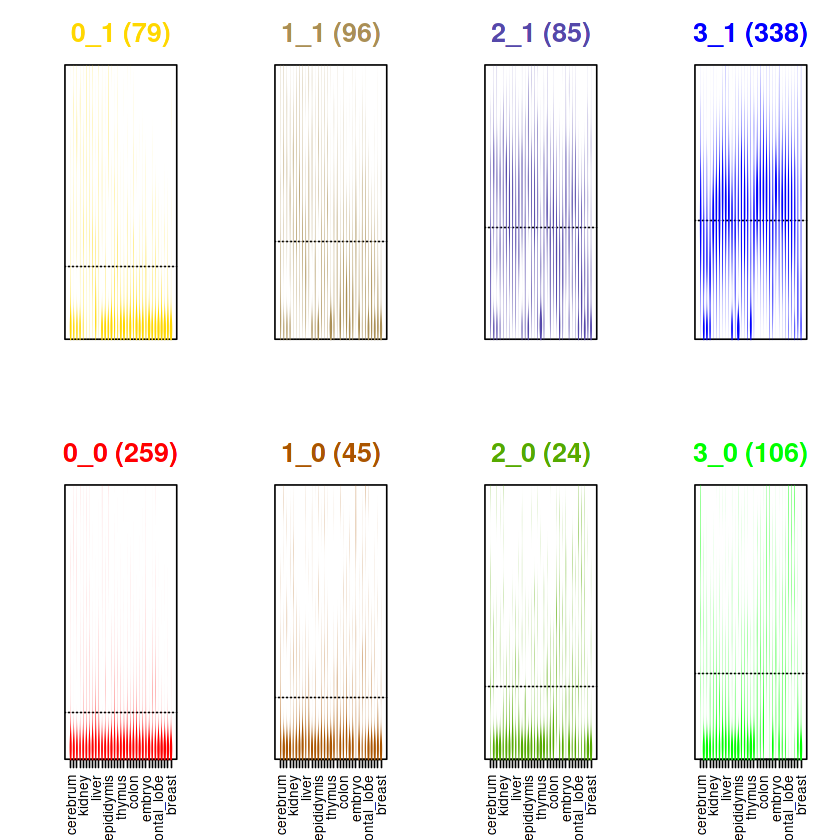

In [33]:
# Distribution of expression across samples for 8 clusters returned by SOM (4 x 2 map)

plotExpressionProfiles(tissuesCAGEset, what = "consensusClusters")

In [34]:
# extract promoters belonging to a specific cluster

class3_1 <- extractExpressionClass(tissuesCAGEset, what = "consensusClusters", which = "3_1")

In [35]:
head(class3_1)

,consensus.cluster,chr,start,end,strand,tpm,cerebrum,renal_artery,ureter,urinary_bladder,⋯,embryo,bone_marrow,heart,muscle,frontal_lobe,occipital_lobe,parietal_lobe,spleen,breast,expression_class
,<int>,<fct>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,chr1,945347,945403,+,405.68093,2.303700,1.003785,0.000000,3.613154,⋯,14.885154,1.4551600,13.1446660,14.2733279,4.2588725,2.3201428,2.039976,14.478519,11.018331,3_1
12,12,chr1,20832541,20832589,+,260.69841,14.924337,1.003785,3.785400,0.000000,⋯,4.102055,2.8210246,4.7638700,2.4904767,13.5397985,36.9299082,33.409384,1.524932,12.296147,3_1
16,16,chr1,27192769,27192792,+,266.45357,3.804511,0.000000,0.000000,1.353002,⋯,3.919948,0.9756955,2.9025608,1.1107948,9.5256440,8.4356640,14.588204,3.555599,1.184346,3_1
17,17,chr1,28705142,28705143,+,116.29095,0.194330,0.000000,1.183221,0.000000,⋯,1.111318,47.3624721,2.6630805,0.5713101,0.5302346,0.1933959,1.353943,0.000000,0.000000,3_1
24,24,chr1,36462597,36462679,+,63.07827,2.415811,1.003785,1.183221,5.718615,⋯,1.291192,2.4777373,0.7733161,1.9218502,0.0000000,2.1024081,1.353943,10.022924,0.000000,3_1
25,25,chr1,39229513,39229592,+,662.62964,13.450420,6.358172,4.968621,3.790813,⋯,22.884981,15.7752695,13.3451329,14.4717499,22.3022658,21.3828870,26.077287,35.594544,19.397440,3_1
